In [1]:
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = load_diabetes(as_frame=True)['frame']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Verificando as Distribuições de cada coluna

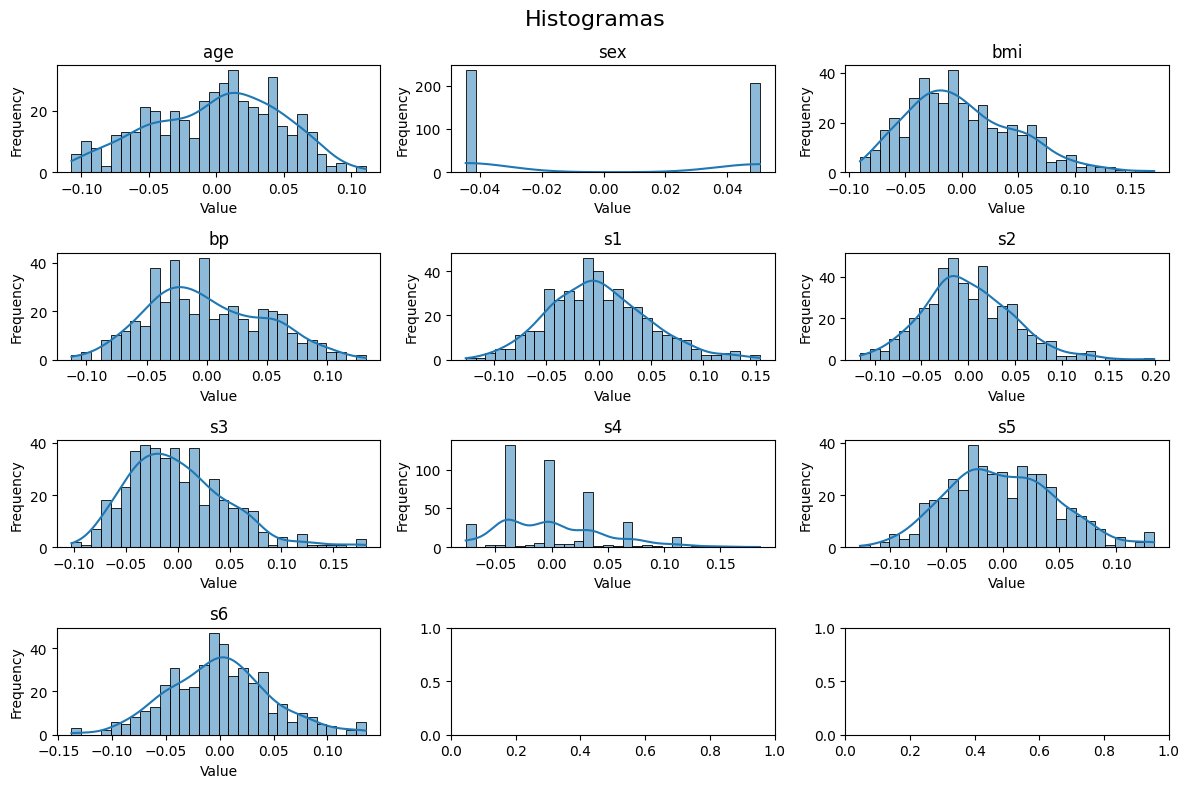

In [3]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
fig.suptitle("Histogramas", fontsize=16)

for i, ax in enumerate(axes.ravel()):
    if i > 9: 
        break 

    sns.histplot(df.iloc[:, i], ax=ax, kde=True, bins=30)
    ax.set_title(df.columns[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Verificação da Normalidade via QQ Plot

Após visualizar o histograma e kde plot alguns alguns possíveis atributos que aparentam provir de uma distribuição normal.

Será testado via QQ Plot

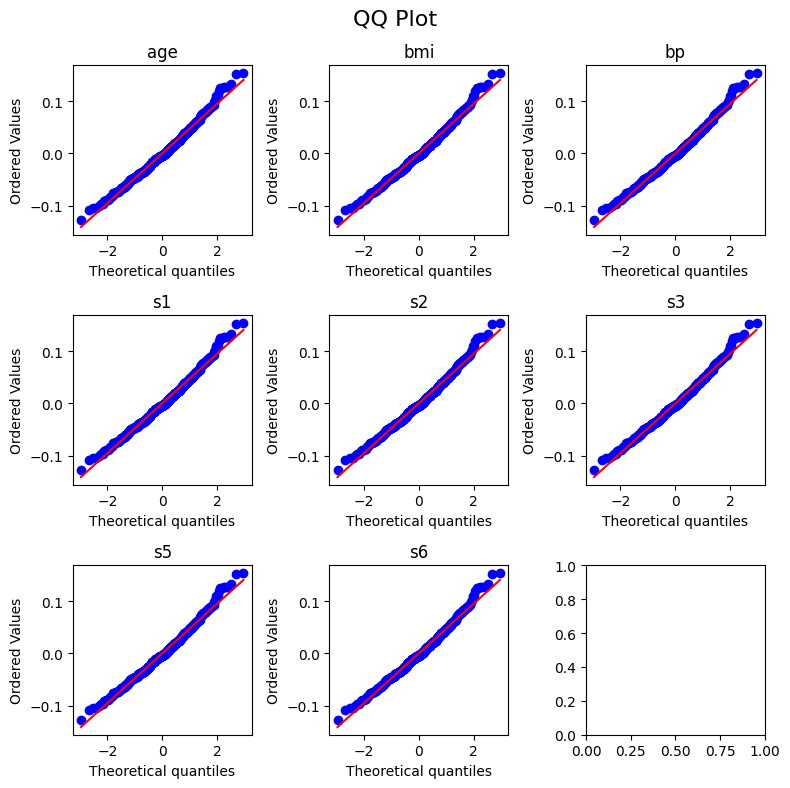

In [4]:
cols = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

for i, col in enumerate(cols):
    if i > len(cols): 
        break 

    ax = axs[int(i // 3), i % 3]
    stats.probplot(df.s1, dist='norm', plot=ax)
    ax.set_title(col)

fig.suptitle('QQ Plot', fontsize=16)
plt.tight_layout()
plt.show()

## Testes de normalidade Shapiro-Wilk e Kolmogorov-Smirnov

Testamos as colunas prévias nos testes de normalidade Shapiro-Wilk e Kolmogorov-Smirnov e verificamos que a hipótese nula é rejeitada em todos, 

ou seja, os testes indicam que as colunas embora aparentem, não pertencem a uma distribuição normal pois rejeitamos a hipótese nula H0.

In [5]:
shapiro_results = []

for col in cols:
    shapiro_test = stats.shapiro(df[col])
    ks_test = stats.kstest(df[col], 'norm')
    shapiro_results.append([col, shapiro_test.pvalue, ks_test.pvalue])

pd.DataFrame(shapiro_results, columns=['Column', 'Shapiro-Wilk', 'Kolmogorov-Smirnov']).round(6)

,Column,Shapiro-Wilk,Kolmogorov-Smirnov
0,age,0.000033,0.0
1,bmi,0.000000,0.0
2,bp,0.000071,0.0
3,s1,0.005129,0.0
4,s2,0.001309,0.0
5,s3,0.000000,0.0
6,s5,0.009549,0.0
7,s6,0.040935,0.0
